# UCL AI Society Machine Learning Tutorials
### Session 03. Unsupervised learning - Clustering

### Contents
1. Data Pre-processing and Dimensionality Reduction
2. Support Vector Machine (SVM)
3. Clustering: Kmeans

### Aim 
At the end of this session, you will be able to:  

- Clean your dataset and reduce its redundancy.
- Implement two of the most important ML model: SVM and Kmeans
- Understand the differences between unsupervised and supervised learning.

In [3]:
# Learn PCA before doing this notebook
# We use PCA without explanation.
# However, you need to know that PCA is often used in unsupervised learning to simplify the dimension

**About Clustering. Useful Websites. Please take your time to read.**

https://developers.google.com/machine-learning/clustering/clustering-algorithms  
https://towardsdatascience.com/the-5-clustering-algorithms-data-scientists-need-to-know-a36d136ef68  
https://towardsdatascience.com/k-means-clustering-of-wine-data-95bac074baae

KMeans Clustering step-by-step visualisation
![kmeans](https://miro.medium.com/max/960/1*KrcZK0xYgTa4qFrVr0fO2w.gif)

## clustering Wine Dataset 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA

Duplicate key in file '/Users/toeun_kim/.matplotlib/matplotlibrc', line 2 ('backend: TkAgg')


In [2]:
wine = load_wine()

In [3]:
wine.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [4]:
wine.data.shape, wine.target.shape, wine.target_names, wine.feature_names

((178, 13),
 (178,),
 array(['class_0', 'class_1', 'class_2'], dtype='<U7'),
 ['alcohol',
  'malic_acid',
  'ash',
  'alcalinity_of_ash',
  'magnesium',
  'total_phenols',
  'flavanoids',
  'nonflavanoid_phenols',
  'proanthocyanins',
  'color_intensity',
  'hue',
  'od280/od315_of_diluted_wines',
  'proline'])

In [5]:
X = wine.data
y = wine.target
feature_names = wine.feature_names

In [6]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [7]:
import pandas as pd
pd.DataFrame(X, columns=feature_names)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [8]:
def visualise_wine(X, labels=None, col_in_X=(0,1), set_labels=False):
    """
    Since you can only graph two columns, this function takes two column indices in X which are to be drawn.
    @param: X        --> Data
    @param: lables   --> Default is set to None, but if you've got your result of labels from clustering, 
                         you can input according labels in a list format.
    @param: col_in_X --> column index of dataset X to be selected for plotting.
                         two-element tuple if you want 2D graph,
                         three-element tuple if you want 3D graph.
    @param: feature_names
    """
    assert type(col_in_X) is tuple
    
    if len(col_in_X)==2:  # 2D
        first_col, second_col = col_in_X[0], col_in_X[1]
        
        if set_labels:
            plt.xlabel(feature_names[first_col])
            plt.ylabel(feature_names[second_col])
            
        plt.scatter(X[:, first_col], X[:, second_col], c=labels)
        
    elif len(col_in_X)==3:  # 3D
        first_col, second_col, third_col = col_in_X[0], col_in_X[1], col_in_X[2]
        fig = plt.figure()
        plt.clf()
        ax = Axes3D(fig, elev=20)  # elev is an elevation of viewing angle (default: 30)

        plt.cla()
        
        if set_labels:
            ax.set_xlabel(feature_names[first_col])
            ax.set_ylabel(feature_names[second_col])
            ax.set_zlabel(feature_names[third_col])

        ax.scatter(X[:, first_col], X[:, second_col], X[:, third_col], c=labels)
        
    else:
        raise RuntimeError("Your dimension should be either set to \"2d\" or \"3d\"")
        
    plt.show()

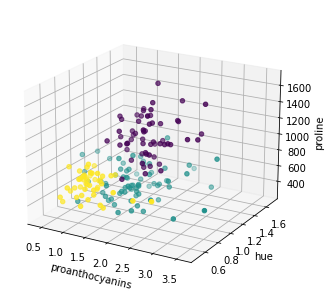

In [9]:
# try out different col_in_X and get some feeling of how the data is shaped.
visualise_wine(X, labels=y, col_in_X=(8, 10, 12), set_labels=True)

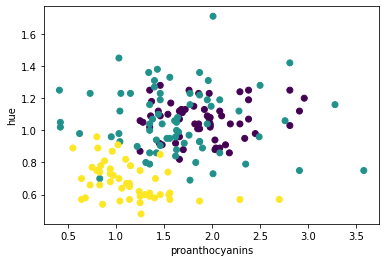

In [10]:
visualise_wine(X, labels=y, col_in_X=(8, 10), set_labels=True)

In [11]:
# We will run PCA on our wine dataset before clustering into groups.
# TODO: complete run_PCA()

In [18]:
def run_PCA(X, num_components=2):
    # TODO: load PCA object with n_components
    pca = PCA(n_components=num_components)
    # TODO: fit
    pca.fit(X)
    # TODO: transform the data
    reduced_array = pca.transform(X)
    
    return reduced_array

In [19]:
# We will use euclidean distance for calculating the distance between two data points.
# TODO: either use scipy distance library or manually implement euclidean distance.
# Manual implementation is very easy.
# Method: x1 - x2 is difference. square it, sum it, and then apply sqrt

In [20]:
def distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

In [21]:
# TODO: Implement your own KMeans

In [22]:
def kmeans(X, initial_centroid_indices, num_clusters=3):

    N = len(X)
    centroids = X[initial_centroid_indices]
    # TODO: initialise labels with N zeros. we are just making a placeholder for prediction of labels. Use numpy
    labels = np.zeros(N)

    while True:
        '''
        Step 1. 
        Find the nearest centroid for each data point
        and allocate your data point to according cluster.
        When finding the nearest centroid, you use euclidean distance
        '''
        is_changed = False
        for i in range(N):
            distances = []
            for k in range(num_clusters):
                # TODO: Get the distance between i'th X and k'th centroid
                k_dist = distance(X[i], centroids[k])
                distances.append(k_dist)

            if labels[i] != np.argmin(distances):
                is_changed = True
            labels[i] = np.argmin(distances)

        '''
        Step 2. 
        Calculate new centroid based on new cluster.
        Centroid is a mean of data points in a cluster.
        '''
        for k in range(num_clusters):
            x = X[labels == k][:, 0]
            y = X[labels == k][:, 1]

            x = np.mean(x)
            y = np.mean(y)

            centroids[k] = [x, y]

        '''
        Step 3. 
        Allocation did not change.
        '''
        if not is_changed:
            break

    return labels

In [23]:
# We will normalize our input X before doing any calculation. 
# This is to feed a better quality data into our PCA and KMeans

In [24]:
# not a todo, but do note that this technique is used very often in ML
# TODO: understand what this function is doing
def normalize(X):
    for dim in range(len(X[0])):    # len(X[0]) is 13 here
        X[:, dim] -= np.min(X[:, dim])
        X[:, dim] /= np.max(X[:, dim])
    return X

In [25]:
def main(X):
    X = normalize(X)
    pca_X = run_PCA(X, num_components=2)
    # TODO: do kmeans with 2-dimensional data (PCA'ed)
    # TODO: initialise centroid incides with a list of three random indices
    # TODO: we want to cluster this into 3 clusters now, but try with different number of clusters
    # Open question: is there any way you can effectively initialise intitial centorid position rather than just random?
    pred_labels = kmeans(pca_X, initial_centroid_indices=[0, 1, 2], num_clusters=3)
    visualise_wine(pca_X, labels=pred_labels)
    
    return pca_X, pred_labels

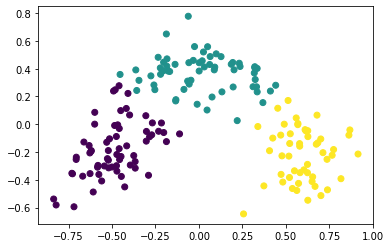

In [26]:
_, pred_labels = main(X)

In [58]:
pred_labels, len(pred_labels)

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 2., 1., 1., 1., 1., 0., 1.,
        1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2.]), 178)

In [59]:
y, len(y)

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2]), 178)

In [56]:
# Maybe we could use hamming distance as an evaluation metric for this particular task?
# The Hamming distance between 1-D arrays u and v, is simply the proportion of disagreeing components in u and v.

In [54]:
from scipy.spatial import distance
distance.hamming(pred_labels, y)

0.05056179775280899

## Open questions  (very important to think about)
**1. How can you effectively evaluate your clustering algorithm?**  
you can look up Dunn Index

**2. In which situation can K-Means algorithm underperform?**  
you can look up different clustering algorithms. That will explain advantages and disadvantages of K-Means.

**3. Is there any way you can effectively initialise intitial centorid position rather than just random?**  

**4. Is there any way you can effectively choose K ?**  
Look up Elbow Method

## Optional 
**Code below is copied from https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_iris.html  
All the credit for this code belongs to scikit-learn documentation, Gaël Varoquaux and Jaques Grobler**

Congratulations! You have manually implemented KMeans clustering algorithm. Now let's see how you can use it in scikit-learn library.  
You will be very familiar with the iris dataset, so we brought the code that uses it. You will be able to understand this code if you've followed this notebook so far.

Reference this documentation to learn KMeans library in-depth:  
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

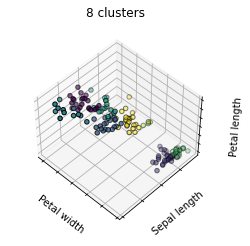

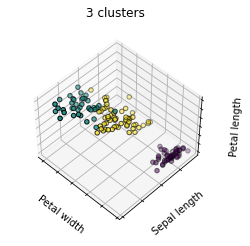

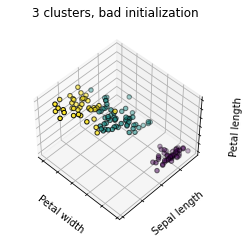

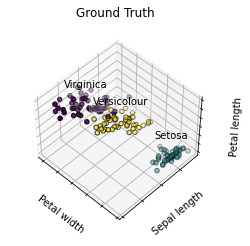

In [2]:
# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn import datasets

np.random.seed(5)

iris = datasets.load_iris()
X = iris.data
y = iris.target

estimators = [('k_means_iris_8', KMeans(n_clusters=8)),
              ('k_means_iris_3', KMeans(n_clusters=3)),
              ('k_means_iris_bad_init', KMeans(n_clusters=3, n_init=1,
                                               init='random'))]

fignum = 1
titles = ['8 clusters', '3 clusters', '3 clusters, bad initialization']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(4, 3))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2],
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title('Ground Truth')
ax.dist = 12

plt.show()